In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
from pathlib import Path

In [3]:
def plotFROC(model_names, dataset, fontsize=20, figsize=(10,6)):
    fig, ax = plt.subplots(1,1,figsize=figsize)
    ax.set_xlabel('Average Number of False Positives', fontsize=fontsize)
    ax.set_ylabel('Metastasis detection sensitivity', fontsize=fontsize)
    xmax = 20
    ax.set_xlim(0, xmax)
    fig.suptitle(f'Free response receiver operating characteristic curve\n Dataset: {dataset}', fontsize=fontsize)
    colors = ["k", "b", "g", "r"]
    points = ["-^", "-.o", "--*", ":."]
    handles = []
    for model_name, color, point in zip(model_names, colors, points):
        df = pd.read_json(f"./results/{model_name}/{dataset}_features_local.json")
        total_FPs = df.total_FPs
        total_sensitivity = df.total_sensitivity
        handle = plt.plot(total_FPs, total_sensitivity, point, color=color, label=model_name)
        handles.append(handle)
    
    ax.legend(labels=model_names, fontsize=fontsize)
#     plt.tight_layout()
    fig.savefig(f"./results/FROC_{dataset}.jpg")
    plt.close()
    return fig

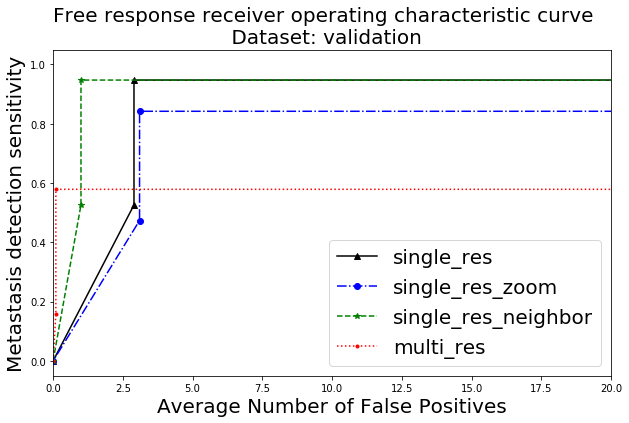

In [4]:
plotFROC(model_names=["single_res", "single_res_zoom", "single_res_neighbor", "multi_res"], dataset="validation")

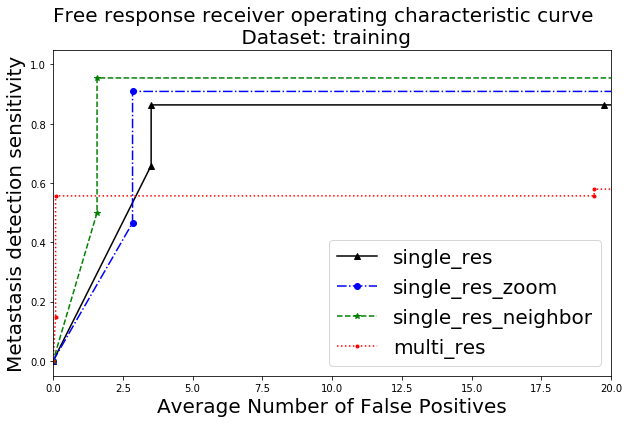

In [5]:
plotFROC(model_names=["single_res", "single_res_zoom", "single_res_neighbor", "multi_res"], dataset="training")

In [6]:
def resize_img(img, factor):
    shape = img.size
    new_shape = tuple(map(lambda x: int(x / factor), shape))
    return img.resize(new_shape)

In [7]:
def display_heatmap(slide_name):
    fontsize= 20
    factor = 4
    thumbnail = np.load(f"./results/thumbnails/{slide_name}.thumbnail.npy")
    thumbnail = resize_img(Image.fromarray(thumbnail), factor)
    
    mask_path = f"./results/mask_thumbnails/{slide_name}.thumbnail.npy"
    include_mask = Path(mask_path).exists()
    
    if include_mask:
        mask = np.load(f"./results/mask_thumbnails/{slide_name}.thumbnail.npy")
        mask = resize_img(Image.fromarray(mask), factor)
    
    nrow = 1
    ncol = 6 if include_mask else 5
    
    fig, ax = plt.subplots(nrow, ncol, figsize=(15,10))

    for c in range(ncol):
        ax[c].axis("off")
    
    ax[0].imshow(thumbnail)
    ax[0].set_title("Original Slide")
    
    if include_mask:
        ax[1].imshow(mask)
        ax[1].set_title("Ground Truth")
    
    for i, model_name in zip(range(-4, 0), ["single_res", "single_res_zoom", "single_res_neighbor", "multi_res"]):
        heatmap = Image.open(f"./results/{model_name}/validation/{slide_name}/heatmap.bmp")
        heatmap = resize_img(heatmap, factor)
        heatmap = np.array(heatmap) / 255
        im = ax[i].imshow(heatmap)
        ax[i].set_title(model_name)
    
    slide_name = slide_name.replace(".tif", "")
#     fig.suptitle(f'{slide_name} Results', fontsize=fontsize)
    plt.tight_layout()
    cax = fig.add_axes([0.27, 0.9, 0.5, 0.05])
    fig.colorbar(im, cax=cax, orientation='horizontal')
    fig.savefig(f"./results/{slide_name}_heatmap.jpg")
    plt.close()
    return fig

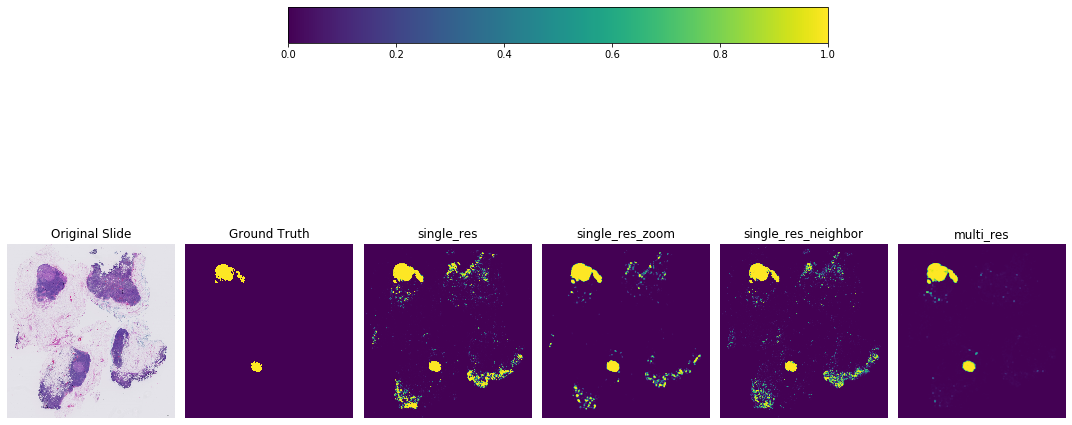

In [8]:
display_heatmap("test_001.tif")

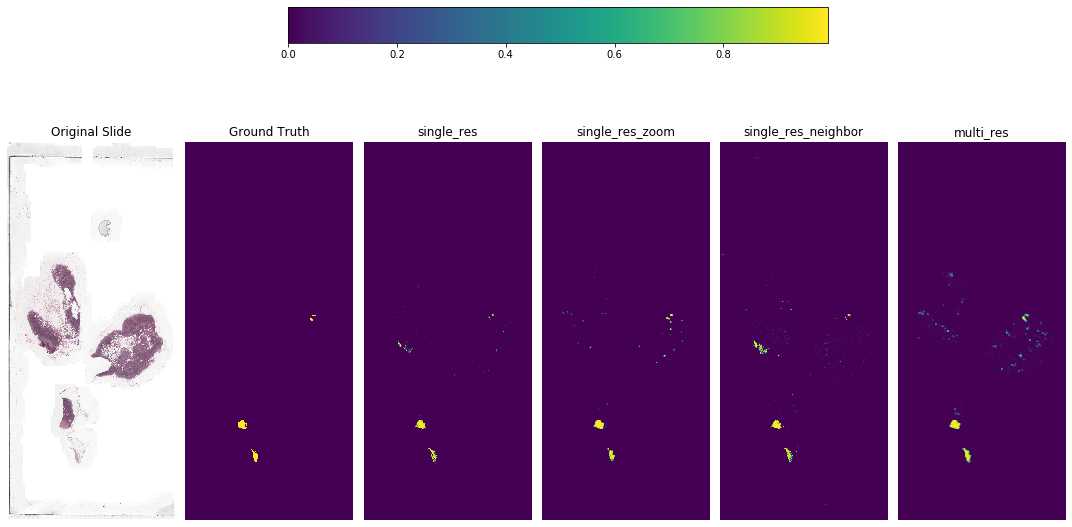

In [9]:
display_heatmap("test_002.tif")

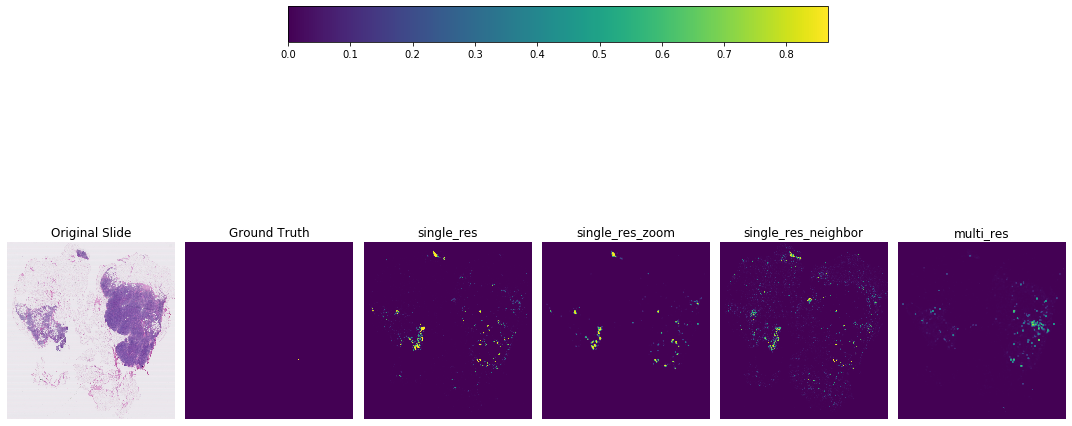

In [10]:
display_heatmap("test_004.tif")

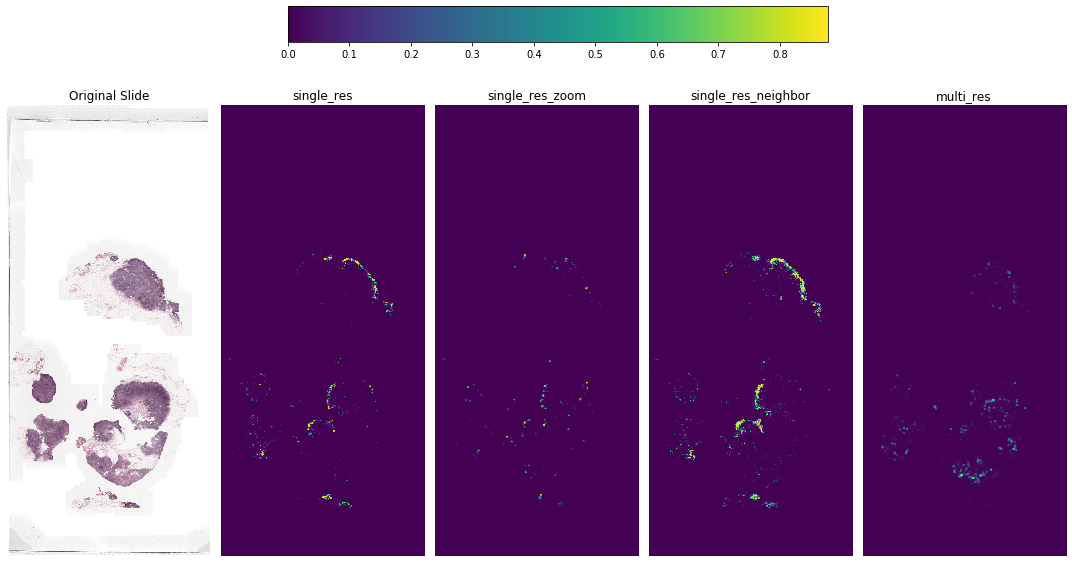

In [11]:
display_heatmap("test_006.tif")

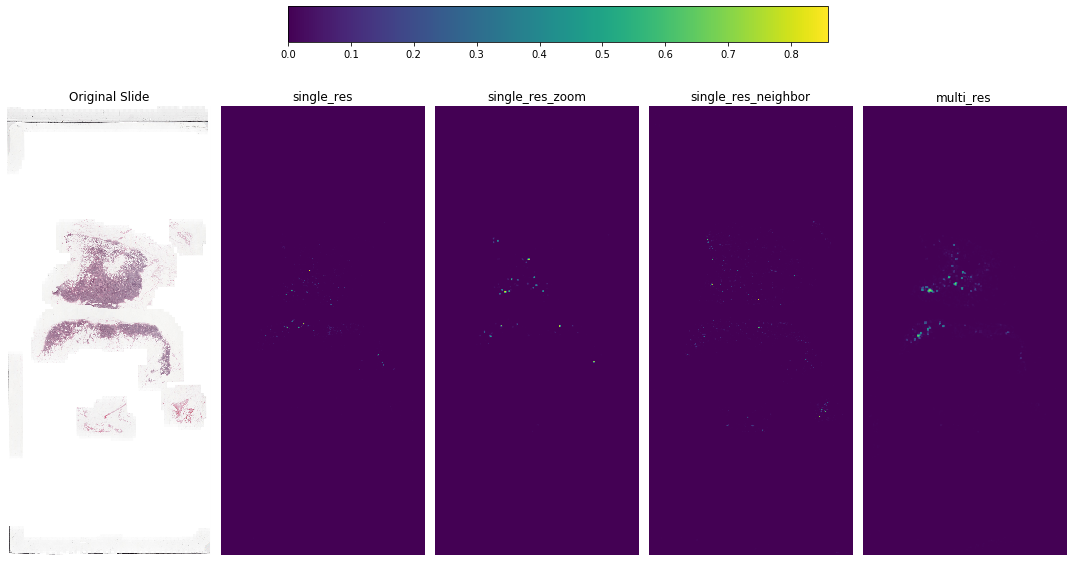

In [12]:
display_heatmap("test_009.tif")

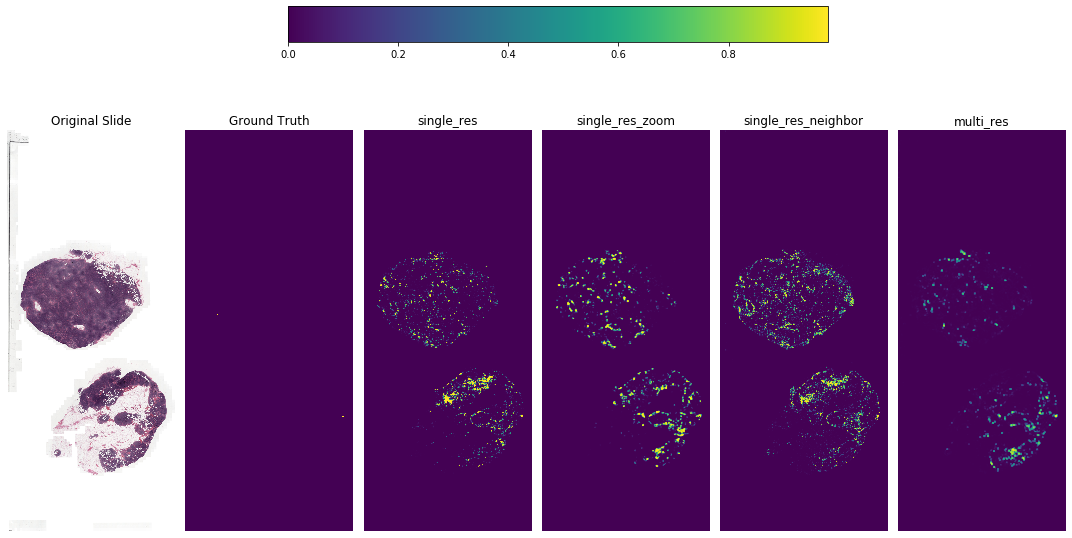

In [13]:
display_heatmap("test_010.tif")

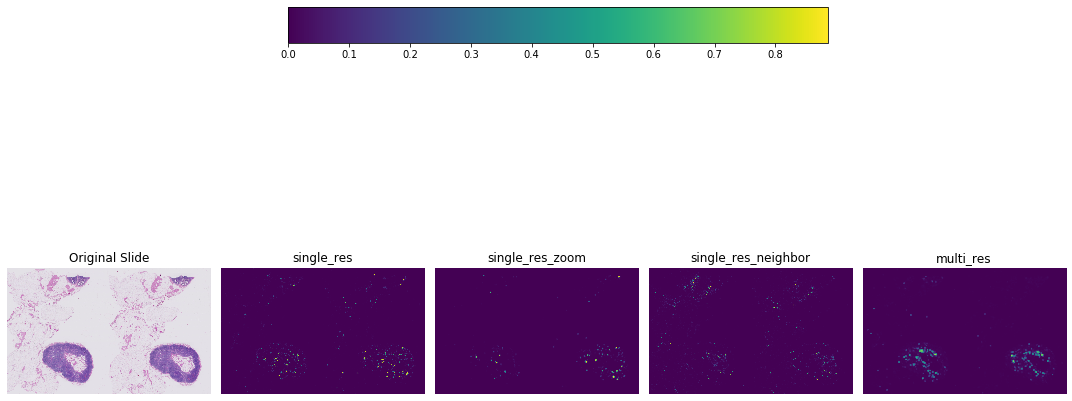

In [14]:
display_heatmap("test_012.tif")

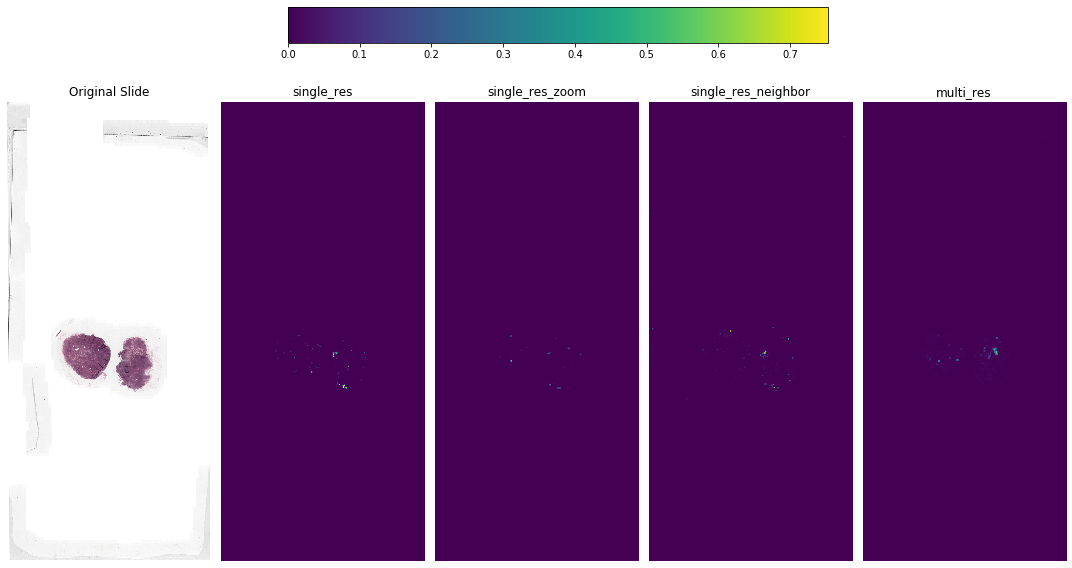

In [15]:
display_heatmap("test_015.tif")

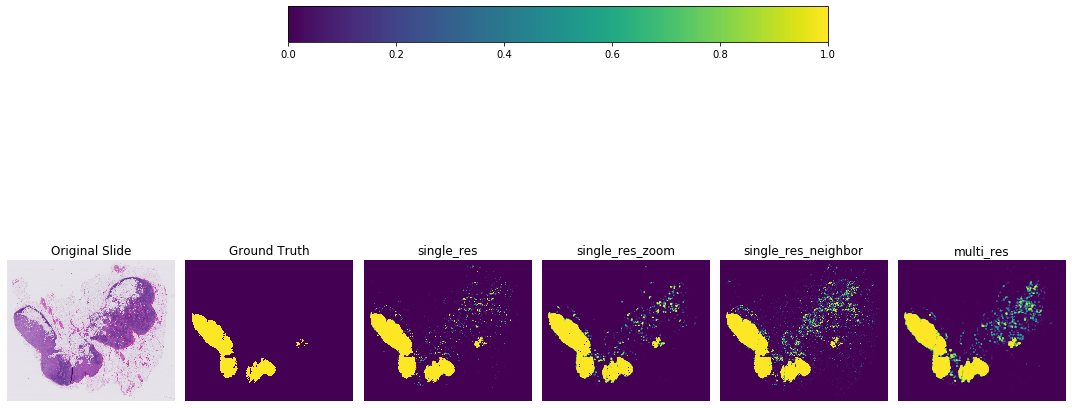

In [16]:
display_heatmap("test_016.tif")

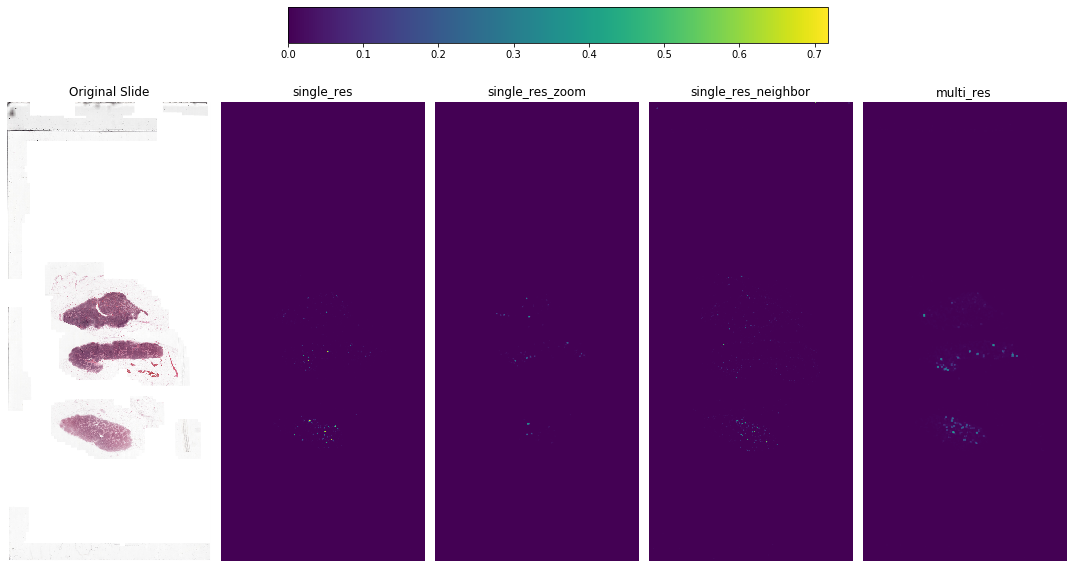

In [17]:
display_heatmap("test_017.tif")